# Profile plots using HTSeq

Tutorial from https://htseq.readthedocs.io/en/latest/tutorials/tss.html

### Imports

In [1]:
import numpy as np
import pandas as pd
import HTSeq
import itertools
import matplotlib.pyplot as plt

### File Paths

In [2]:
GTF_PATH = "/home/stud5/testfiles/gtffiles/"
GTF_NAME = "homo_sapiens.104.mainChr.gtf"
BED_PATH = "/home/stud5/testfiles/fragments/"
BED_NAME = "stomach_SM-JF1O3_rep1_fragments.bed"

### Create Genomic Array from Bed File

In [3]:
#read bed file
bedfile = open(BED_PATH+BED_NAME, "r")

In [4]:
#Create Genomic Array (coverage)
coverage = HTSeq.GenomicArray("auto", stranded=False, typecode="i")
#get data from file
#add it in coverage
for line in bedfile:
    chrom, start, end, cell, value, strand = line.strip().split()
    coverage[HTSeq.GenomicInterval(chrom, int(start), int(end), strand)] += 1

### Create TSS set from Gtf File

In [5]:
#read gtf file
gtffile = HTSeq.GFF_Reader(GTF_PATH+GTF_NAME)

In [6]:
tsspos = set()
for feature in gtffile:
    if feature.type == "exon" and feature.attr["exon_number"] == "1":
        tsspos.add(feature.iv.start_d_as_pos)

In [7]:
len(tsspos)

209169

### Define Profile

In [8]:
halfwinwidth = 3000
profile = np.zeros(2*halfwinwidth, dtype='i')

### Populate profile at each TSS

In [9]:
for p in tsspos:
    start = p.pos - halfwinwidth
    if(start<0): continue
    window = HTSeq.GenomicInterval(p.chrom, p.pos - halfwinwidth, p.pos + halfwinwidth, ".")
    wincvg = np.fromiter(coverage[window], dtype='i', count=2*halfwinwidth)
    if p.strand == "+":
        profile += wincvg
    else:
        profile += wincvg[::-1]

### Plot Profile

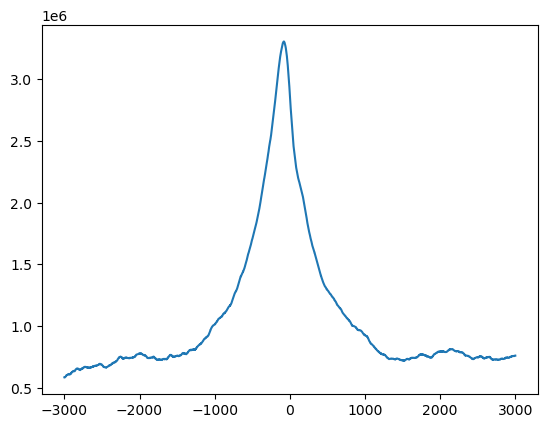

In [10]:
fig, ax = plt.subplots()             
x = np.arange(-halfwinwidth, halfwinwidth)  
ax.plot(x, profile)  
plt.show()  